In [2]:
!wget 'http://eigentaste.berkeley.edu/dataset/jester_dataset_1_joke_texts.zip'

--2020-07-24 15:19:21--  http://eigentaste.berkeley.edu/dataset/jester_dataset_1_joke_texts.zip
Resolving eigentaste.berkeley.edu (eigentaste.berkeley.edu)... 128.32.192.72
Connecting to eigentaste.berkeley.edu (eigentaste.berkeley.edu)|128.32.192.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92053 (90K) [application/zip]
Saving to: ‘jester_dataset_1_joke_texts.zip’

jester_dataset_1_jo 100%[===================>]  89.90K   327KB/s    in 0.3s    

2020-07-24 15:19:22 (327 KB/s) - ‘jester_dataset_1_joke_texts.zip’ saved [92053/92053]



In [3]:
!wget 'http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip'

--2020-07-24 15:19:28--  http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip
Resolving eigentaste.berkeley.edu (eigentaste.berkeley.edu)... 128.32.192.72
Connecting to eigentaste.berkeley.edu (eigentaste.berkeley.edu)|128.32.192.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4171628 (4.0M) [application/zip]
Saving to: ‘jester_dataset_1_1.zip’

jester_dataset_1_1. 100%[===================>]   3.98M  3.57MB/s    in 1.1s    

2020-07-24 15:19:30 (3.57 MB/s) - ‘jester_dataset_1_1.zip’ saved [4171628/4171628]



In [4]:
from zipfile import ZipFile
with ZipFile('jester_dataset_1_joke_texts.zip') as z:
  z.extractall()

In [5]:
with ZipFile('jester_dataset_1_1.zip') as z:
  z.extractall()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import re
from sklearn.decomposition import PCA

In [7]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
dataset=pd.read_excel('/content/jester-data-1.xls')

In [9]:
dataset.head()

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.0,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [10]:
jokes=[]
for joke in range(1,101):
  with open('/content/jokes/init'+str(joke)+'.html') as f:
    jokes.append(re.findall(r'<!--begin of joke -->(.*?)<!--end of joke -->',re.sub('\n|<[a-zA-Z\/]{1,}?>',' ',f.read()))[0])


In [11]:
Y=dataset.iloc[:,1:].values
mask=(Y!=99.00).astype("float")

In [12]:
X=tf.Variable(initial_value=np.random.random((100,80))/1e+2)

In [13]:
W=tf.Variable(np.random.random((Y.shape[0],80))/1e+2)

In [14]:
loss_basic=(tf.reduce_sum(tf.abs(mask*(tf.matmul(W,tf.transpose(X))-mask*Y))))/Y.shape[0]

In [15]:
loss=(tf.reduce_sum(mask*tf.square(tf.matmul(W,tf.transpose(X))-mask*Y))+0.00000001*tf.reduce_sum(W**2)+ 0.00000001*tf.reduce_sum(X**2))/Y.shape[0]

In [16]:
optimizer=tf.train.GradientDescentOptimizer(3.0)

In [17]:
op=optimizer.minimize(loss)

In [18]:
losses=[]
epochs=150
init=tf.global_variables_initializer()
with tf.Session() as sess:

  sess.run(init)
  for epoch in range(epochs):
    #print("Epoch : "+str(epoch+1)+"/"+str(epochs))
    _,cost=sess.run([op,loss_basic])
    #print("Loss : "+str(cost))
    losses.append(cost)

  X_trained=X.eval()
  W_trained=W.eval()

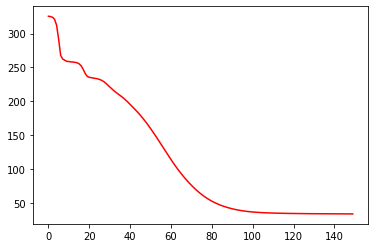

In [19]:
plt.plot(range(len(losses)),losses,color="red")

In [20]:
cost

34.09690894263764

In [21]:
np.sum(np.abs((Y[2:3,:]-np.dot(X_trained,W_trained[2:3,:].T).T)*mask[2:3,:]))

0.7374198349927412

In [ ]:
W_trained.shape

(24982, 80)

In [30]:
user=2
joke=62
np.dot(W_trained[user:user+1,:],X_trained[joke:joke+1,:].T)

array([[3.23035423]])

In [ ]:
pca=PCA(2)

In [ ]:
X_reduced=pca.fit_transform(X_trained)

In [ ]:
X

array([ 1.06997111, -4.85803237])

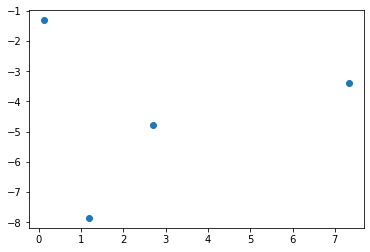

In [ ]:
plt.scatter(X_reduced[1:5,0],X_reduced[1:5,1])

In [ ]:
# finding similar Jokes
sim=0
joke=42
sim_joke=joke
for i in range(100):
  if i==joke :
    continue
  temp=np.dot(X_trained[i:i+1,:],X_trained[joke:joke+1,:].T)/(np.linalg.norm(X_trained[i:i+1,:])*np.linalg.norm(X_trained[joke:joke+1,:]))
  if temp>sim :
    sim_joke=i
    sim=temp


In [ ]:
sim_joke

8

In [ ]:
jokes[joke]

' Arnold Swartzeneger and Sylvester Stallone are making a movie about the lives of the great composers.    Stallone says "I want to be Mozart."   Swartzeneger says: "In that case...  I\'ll be Bach." '

In [ ]:
jokes[sim_joke]

' A country guy goes into a city bar that has a dress code, and the maitre d\'  demands he wear a tie. Discouraged, the guy goes to his car to sulk when  inspiration strikes: He\'s got jumper cables in the trunk! So he wraps them around his neck, sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d\' is reluctant, but says to the guy, "Okay, you\'re a pretty resourceful fellow, you can come in... but just don\'t start anything"!   '